In [ ]:
!wget -O Filtered_Renamed_LUAD.csv.gz https://github.com/Phibio2LUAD/LUAD_DATA/raw/main/Filtered_Renamed_LUAD.csv.gz

--2021-02-21 18:54:58--  https://github.com/Phibio2LUAD/LUAD_DATA/raw/main/Filtered_Renamed_LUAD.csv.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phibio2LUAD/LUAD_DATA/main/Filtered_Renamed_LUAD.csv.gz [following]
--2021-02-21 18:54:59--  https://raw.githubusercontent.com/Phibio2LUAD/LUAD_DATA/main/Filtered_Renamed_LUAD.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23482134 (22M) [application/octet-stream]
Saving to: ‘Filtered_Renamed_LUAD.csv.gz’

Filtered_Renamed_LU 100%[===================>]  22.39M  --.-KB/s    in 0.1s    

2021-02-21 18:54:59 (174 MB/s) - ‘Filtered_Renamed_LU

In [ ]:
pip install lifelines

     |████████████████████████████████| 348kB 19.6MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp36-none-any.whl size=4035 sha256=cd48a292a7628d2a4ea2885679ca08bde0da2257eda0d062f098193c0aa84cca
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [ ]:
import gzip
import shutil
import pandas as pd

import os
import numpy as np
import json 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
import lifelines
from scipy.stats import zscore
from sklearn.datasets import make_blobs
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [ ]:
with gzip.open('Filtered_Renamed_LUAD.csv.gz', 'rb') as fin, open('Filtered_Renamed_LUAD.csv', 'wb') as fout:
    shutil.copyfileobj(fin, fout)

In [ ]:
Data = pd.read_csv('Filtered_Renamed_LUAD.csv', index_col='GeneID')

In [ ]:
Data

,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,TCGA-75-6206-01A,TCGA-78-7153-01A,TCGA-38-4626-01A,TCGA-55-8614-01A,TCGA-55-7283-01A,TCGA-44-2662-01B,TCGA-MP-A4T6-01A,TCGA-44-3918-01B,TCGA-62-8394-01A,TCGA-62-8395-01A,TCGA-MP-A4TA-01A,TCGA-55-A4DG-01A,TCGA-NJ-A4YI-01A,TCGA-83-5908-01A,TCGA-75-5126-01A,TCGA-55-8510-01A,TCGA-44-6777-11A,TCGA-55-7914-01A,TCGA-93-A4JP-01A,TCGA-44-5645-01A,TCGA-69-8453-01A,TCGA-50-5935-01A,TCGA-55-8508-01A,TCGA-05-4424-01A,TCGA-44-2656-01A,TCGA-44-6776-01A,TCGA-55-5899-01A,TCGA-4B-A93V-01A,TCGA-55-8620-01A,TCGA-44-3396-01A,TCGA-55-8513-01A,...,TCGA-64-5781-01A,TCGA-44-7660-01A,TCGA-38-4629-01A,TCGA-49-4506-01A,TCGA-49-6745-11A,TCGA-J2-A4AD-01A,TCGA-55-7227-01A,TCGA-86-8054-01A,TCGA-50-6593-01A,TCGA-MP-A4T4-01A,TCGA-55-6971-11A,TCGA-55-6970-01A,TCGA-86-8076-01A,TCGA-50-7109-01A,TCGA-44-5643-01A,TCGA-55-A492-01A,TCGA-05-4384-01A,TCGA-44-2668-01A.1,TCGA-55-A57B-01A,TCGA-62-A46P-01A,TCGA-55-8087-01A,TCGA-78-7146-01A,TCGA-91-7771-01A,TCGA-64-1678-01A,TCGA-55-8089-01A,TCGA-86-A4P8-01A,TCGA-49-4501-01A,TCGA-44-7670-01A,TCGA-L9-A443-01A,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A,TCGA-05-4420-01A
GeneID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083,10.661934,12.756923,19.094920,11.168274,9.837056,8.492741,14.357999,10.657586,4.684553,20.560490,17.132631,7.512377,11.228448,15.867582,6.532636,9.419980,9.369890,8.425633,17.703146,21.573360,17.232473,13.524374,10.881393,11.478670,10.887653,9.341572,13.093676,11.146968,4.558297,11.979162,12.717058,20.138556,9.246771,2.094284,10.433463,9.563260,12.375871,14.101486,12.568754,13.437021,...,11.828193,12.892553,5.030295,7.646984,4.897420,8.893702,12.033755,22.450462,8.411252,12.201109,9.573438,27.888000,16.621761,14.387725,18.083163,7.124525,21.966810,11.868987,9.133371,9.947348,14.485791,12.514246,13.761454,4.785966,9.367376,17.476264,8.330157,12.870718,7.343476,16.609420,24.518670,7.972194,15.663358,8.498830,5.047150,13.362832,13.049457,12.322913,13.465018,8.771928
ENSG00000198242,81.616770,143.482436,147.946233,232.389325,100.903838,122.296654,162.093251,226.445669,222.753788,142.700814,226.177566,97.478915,75.665342,220.058412,28.611527,123.386316,32.519415,92.921743,84.848802,84.941903,108.071631,105.970584,116.173560,200.753276,109.654109,102.441309,183.523390,67.096616,107.916504,145.171063,197.732988,176.488939,217.654016,106.016424,148.571400,134.580462,251.086568,99.776884,116.842889,90.505705,...,252.783366,113.272854,244.661039,455.168108,157.894162,60.020678,188.380098,282.558330,199.856625,103.226014,81.500013,150.116975,243.401564,192.388265,235.864263,254.904858,120.662269,82.953798,116.402574,227.229718,138.311764,109.503757,137.801718,344.894604,131.501268,83.478835,217.613749,134.761895,342.882841,138.564509,58.304312,290.846355,141.402228,91.546297,150.911361,131.525148,176.059819,165.412981,151.470036,186.597075
ENSG00000134108,28.928312,28.534671,17.519692,29.839709,27.732027,29.279139,34.033121,33.251160,39.433805,34.569690,22.492761,35.520642,17.621284,29.463945,42.405127,13.098987,55.980834,18.616067,45.320451,20.678486,30.964566,31.975524,18.211867,32.439189,20.721615,32.138016,21.225079,28.510883,30.213410,26.804176,28.365526,14.302643,34.305313,42.990467,25.636470,35.560846,27.199561,21.348363,37.341515,27.720208,...,22.621972,16.653519,37.215235,21.837844,42.385283,43.835677,36.666405,24.655895,25.081607,20.883848,36.773415,36.088706,31.005252,14.169119,38.979696,22.989390,42.599386,24.320465,28.958653,37.435119,31.346066,34.234777,28.559361,18.237318,29.264249,33.275165,27.547686,29.324964,51.999403,26.203790,23.218813,40.895382,16.916851,36.458708,34.414775,21.835067,22.489643,23.130244,18.624145,29.278537
ENSG00000167700,7.009133,9.236998,12.641371,3.295189

In [ ]:
import numpy as np

In [ ]:
#Applies log2 to data entries
Data = np.log2(Data+1)

In [ ]:
Data

,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,TCGA-75-6206-01A,TCGA-78-7153-01A,TCGA-38-4626-01A,TCGA-55-8614-01A,TCGA-55-7283-01A,TCGA-44-2662-01B,TCGA-MP-A4T6-01A,TCGA-44-3918-01B,TCGA-62-8394-01A,TCGA-62-8395-01A,TCGA-MP-A4TA-01A,TCGA-55-A4DG-01A,TCGA-NJ-A4YI-01A,TCGA-83-5908-01A,TCGA-75-5126-01A,TCGA-55-8510-01A,TCGA-44-6777-11A,TCGA-55-7914-01A,TCGA-93-A4JP-01A,TCGA-44-5645-01A,TCGA-69-8453-01A,TCGA-50-5935-01A,TCGA-55-8508-01A,TCGA-05-4424-01A,TCGA-44-2656-01A,TCGA-44-6776-01A,TCGA-55-5899-01A,TCGA-4B-A93V-01A,TCGA-55-8620-01A,TCGA-44-3396-01A,TCGA-55-8513-01A,...,TCGA-64-5781-01A,TCGA-44-7660-01A,TCGA-38-4629-01A,TCGA-49-4506-01A,TCGA-49-6745-11A,TCGA-J2-A4AD-01A,TCGA-55-7227-01A,TCGA-86-8054-01A,TCGA-50-6593-01A,TCGA-MP-A4T4-01A,TCGA-55-6971-11A,TCGA-55-6970-01A,TCGA-86-8076-01A,TCGA-50-7109-01A,TCGA-44-5643-01A,TCGA-55-A492-01A,TCGA-05-4384-01A,TCGA-44-2668-01A.1,TCGA-55-A57B-01A,TCGA-62-A46P-01A,TCGA-55-8087-01A,TCGA-78-7146-01A,TCGA-91-7771-01A,TCGA-64-1678-01A,TCGA-55-8089-01A,TCGA-86-A4P8-01A,TCGA-49-4501-01A,TCGA-44-7670-01A,TCGA-L9-A443-01A,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A,TCGA-05-4420-01A
GeneID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083,3.543735,3.782086,4.328759,3.605053,3.437901,3.246825,3.940918,3.543197,2.507047,4.430318,4.180516,3.089562,3.612169,4.076181,2.913155,3.381281,3.374329,3.236590,4.225209,4.496549,4.188438,3.860404,3.570632,3.641392,3.571392,3.370384,3.816976,3.602524,2.474643,3.698125,3.777899,4.401805,3.357097,1.629605,3.515191,3.400983,3.741561,3.916619,3.762216,3.851701,...,3.681246,3.796240,2.592228,3.112197,2.560084,3.306511,3.704181,4.551544,3.234387,3.722587,3.402373,4.852398,4.139286,3.943708,4.254228,3.022284,4.521479,3.685827,3.341042,3.452510,3.952873,3.756409,3.883763,2.532558,3.373979,4.207601,3.221901,3.793971,3.060649,4.138276,4.673481,3.165461,4.058607,3.247750,2.596255,3.844268,3.812442,3.735838,3.854496,3.288643
ENSG00000198242,6.368363,7.174750,7.218648,7.866595,6.671065,6.945990,7.349553,7.829378,7.805768,7.166924,7.827677,6.621743,6.260503,7.788284,4.888087,6.958684,5.066925,6.553387,6.423726,6.425290,6.769132,6.741070,6.872503,7.656448,6.789913,6.692669,7.527660,6.089511,6.767079,7.191514,7.634688,7.471585,7.772506,6.741688,7.224691,7.083005,7.977775,6.655021,6.880721,6.515790,...,7.987454,6.836339,7.940525,8.833422,7.311922,5.931226,7.565141,8.147502,7.650022,6.703572,6.366322,7.239522,7.933110,7.595356,7.887917,7.999464,6.926738,6.391524,6.875320,7.834343,7.122173,6.787952,7.116882,8.434189,7.049862,6.400518,7.772240,7.084935,8.425773,7.124788,5.890065,8.189065,7.153828,6.532103,7.247086,7.050122,7.468093,7.378624,7.252382,7.551494
ENSG00000134108,4.903439,4.884338,4.210988,4.946717,4.844588,4.920252,5.130648,5.098081,5.337490,5.152576,4.554144,5.190640,4.218881,4.929031,5.439794,3.817520,5.832405,4.293964,5.533577,4.438192,4.998402,5.043324,4.263926,5.063468,4.441059,5.050415,4.474117,4.883175,4.964094,4.797230,4.876052,3.935709,5.141813,5.459119,4.735331,5.192228,4.817601,4.482097,5.260835,4.843994,...,4.562058,4.141884,5.256076,4.513355,5.439134,5.486575,5.235206,4.681218,4.704961,4.451795,5.239299,5.212908,5.000237,3.923065,5.321196,4.584325,5.446236,4.662232,4.904901,5.264353,5.015518,5.138928,4.885543,4.265836,4.919543,5.099092,4.835302,4.922434,5.727904,4.765736,4.598056,5.388719,4.163245,5.227229,5.146279,4.513179,4.553953,4.592771,4.294558,4.920224
ENSG00000167700,3.001646,3.355721,3.769917,2.102722,2.919729,2.673633,4.159291,2.709730,3.539365,3.780040,5.541629,2.687694,4.176367,3.097275,1.149023,3.850480,1.798628,4.395839,4.564898,5.199783,4.338424,2.807063,2.158757,3.358901,3.561653,2.715812,3.140594,3.904641,2.640835,2.822030,3.311235,3.885046,2.371286,1.163910,3.7

In [ ]:
(Data >= 10).sum(axis=1) > len(Data.columns)/4

GeneID
ENSG00000146083    False
ENSG00000198242    False
ENSG00000134108    False
ENSG00000167700    False
ENSG00000070087    False
                   ...  
ENSG00000099991    False
ENSG00000102265    False
ENSG00000133313    False
ENSG00000066044    False
ENSG00000105063    False
Length: 5571, dtype: bool

In [ ]:
Data[(Data >= 10).sum(axis=1) > len(Data.columns)/4]

,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,TCGA-75-6206-01A,TCGA-78-7153-01A,TCGA-38-4626-01A,TCGA-55-8614-01A,TCGA-55-7283-01A,TCGA-44-2662-01B,TCGA-MP-A4T6-01A,TCGA-44-3918-01B,TCGA-62-8394-01A,TCGA-62-8395-01A,TCGA-MP-A4TA-01A,TCGA-55-A4DG-01A,TCGA-NJ-A4YI-01A,TCGA-83-5908-01A,TCGA-75-5126-01A,TCGA-55-8510-01A,TCGA-44-6777-11A,TCGA-55-7914-01A,TCGA-93-A4JP-01A,TCGA-44-5645-01A,TCGA-69-8453-01A,TCGA-50-5935-01A,TCGA-55-8508-01A,TCGA-05-4424-01A,TCGA-44-2656-01A,TCGA-44-6776-01A,TCGA-55-5899-01A,TCGA-4B-A93V-01A,TCGA-55-8620-01A,TCGA-44-3396-01A,TCGA-55-8513-01A,...,TCGA-64-5781-01A,TCGA-44-7660-01A,TCGA-38-4629-01A,TCGA-49-4506-01A,TCGA-49-6745-11A,TCGA-J2-A4AD-01A,TCGA-55-7227-01A,TCGA-86-8054-01A,TCGA-50-6593-01A,TCGA-MP-A4T4-01A,TCGA-55-6971-11A,TCGA-55-6970-01A,TCGA-86-8076-01A,TCGA-50-7109-01A,TCGA-44-5643-01A,TCGA-55-A492-01A,TCGA-05-4384-01A,TCGA-44-2668-01A.1,TCGA-55-A57B-01A,TCGA-62-A46P-01A,TCGA-55-8087-01A,TCGA-78-7146-01A,TCGA-91-7771-01A,TCGA-64-1678-01A,TCGA-55-8089-01A,TCGA-86-A4P8-01A,TCGA-49-4501-01A,TCGA-44-7670-01A,TCGA-L9-A443-01A,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A,TCGA-05-4420-01A
GeneID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000198888,10.288962,10.638540,13.230681,10.710343,10.998312,11.685862,11.284676,10.368466,10.144408,10.638131,12.391084,11.325501,11.901463,11.068031,9.266575,11.005494,9.736682,11.462329,10.526644,12.160581,12.262101,12.022454,10.276304,10.322754,12.564622,11.280960,11.226601,11.575895,3.589004,11.249790,10.984557,12.342576,11.696375,5.660976,11.169383,10.973994,12.006278,11.377349,10.034024,11.470731,...,9.817756,12.861048,10.596539,9.971745,10.331077,12.580901,11.796182,10.024639,11.908017,11.601781,11.643624,11.553962,10.943239,12.192848,11.075304,11.431517,11.511263,10.256202,11.684346,11.977649,10.071038,9.670354,12.009428,10.685430,10.677454,11.800819,11.021557,10.984597,12.032615,11.468934,11.052492,10.558597,12.256165,11.349351,11.144304,12.486932,10.339076,11.727786,10.546505,11.763759
ENSG00000197956,10.569549,9.865001,8.298794,10.835221,9.731668,10.614391,11.729352,11.016864,12.890397,9.904189,9.701506,10.052160,8.871312,10.459890,7.135912,10.760103,8.045145,10.624060,9.032878,10.014545,10.687554,10.202697,12.063549,10.751720,11.437455,9.846844,10.294465,9.862049,9.249683,11.372180,10.691071,10.418152,7.887451,10.931276,10.669637,8.906967,9.086644,10.274397,11.174236,10.036300,...,11.946291,9.779281,12.558716,12.802072,10.905266,10.278536,11.313152,8.552982,11.232569,11.557730,9.952439,9.838363,9.796729,8.573434,7.929775,11.659271,10.815949,10.639177,8.892643,9.944584,9.258214,10.892921,9.792455,10.212560,10.873511,9.354374,11.213854,9.450913,11.416029,9.787903,10.699263,11.980528,7.510225,9.260271,10.869431,11.566449,9.916573,8.657230,10.045787,9.903393
ENSG00000198786,9.654482,9.495633,10.911950,9.029560,10.381002,11.313876,10.388730,9.245917,7.425449,10.431247,10.506359,10.045609,10.440815,9.420977,9.254271,11.291769,9.549670,10.079537,9.858592,9.414495,11.601511,10.409118,9.195224,9.347340,12.024625,10.575230,9.785847,10.967920,4.836146,10.122993,9.447406,11.455719,10.271847,5.465831,9.658003,8.971878,11.472500,10.286548,10.256194,11.074831,...,9.856547,10.792182,8.819923,8.802207,9.659972,11.110387,11.279337,7.990333,10.449280,9.742838,11.149779,9.577651,9.320214,10.976832,9.061108,9.288272,10.653434,8.780478,11.759097,10.478883,9.755920,7.353809,10.665383,8.605544,10.258112,11.173843,9.598368,8.949238,9.054113,9.535402,9.455571,9.308317,11.373622,11.127054,9.786627,11.755721,8.912218,9.853174,10.524530,8.390525
ENSG00000198899,11.355615,11.078160,13.211654,10.778091,11.222405,12.208828,11.163541,11.454858,10.393401,11.096273,13.454203,11.985566,11.698014,10.843085,9.215348,12.

In [ ]:
from scipy.stats import zscore

In [ ]:
#Produces Z Scores on each entry
Data[Data.columns] = zscore(Data, axis=1)

In [ ]:
Data

,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,TCGA-75-6206-01A,TCGA-78-7153-01A,TCGA-38-4626-01A,TCGA-55-8614-01A,TCGA-55-7283-01A,TCGA-44-2662-01B,TCGA-MP-A4T6-01A,TCGA-44-3918-01B,TCGA-62-8394-01A,TCGA-62-8395-01A,TCGA-MP-A4TA-01A,TCGA-55-A4DG-01A,TCGA-NJ-A4YI-01A,TCGA-83-5908-01A,TCGA-75-5126-01A,TCGA-55-8510-01A,TCGA-44-6777-11A,TCGA-55-7914-01A,TCGA-93-A4JP-01A,TCGA-44-5645-01A,TCGA-69-8453-01A,TCGA-50-5935-01A,TCGA-55-8508-01A,TCGA-05-4424-01A,TCGA-44-2656-01A,TCGA-44-6776-01A,TCGA-55-5899-01A,TCGA-4B-A93V-01A,TCGA-55-8620-01A,TCGA-44-3396-01A,TCGA-55-8513-01A,...,TCGA-64-5781-01A,TCGA-44-7660-01A,TCGA-38-4629-01A,TCGA-49-4506-01A,TCGA-49-6745-11A,TCGA-J2-A4AD-01A,TCGA-55-7227-01A,TCGA-86-8054-01A,TCGA-50-6593-01A,TCGA-MP-A4T4-01A,TCGA-55-6971-11A,TCGA-55-6970-01A,TCGA-86-8076-01A,TCGA-50-7109-01A,TCGA-44-5643-01A,TCGA-55-A492-01A,TCGA-05-4384-01A,TCGA-44-2668-01A.1,TCGA-55-A57B-01A,TCGA-62-A46P-01A,TCGA-55-8087-01A,TCGA-78-7146-01A,TCGA-91-7771-01A,TCGA-64-1678-01A,TCGA-55-8089-01A,TCGA-86-A4P8-01A,TCGA-49-4501-01A,TCGA-44-7670-01A,TCGA-L9-A443-01A,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A,TCGA-05-4420-01A
GeneID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENSG00000146083,-0.203432,0.236104,1.244208,-0.090358,-0.398598,-0.750956,0.529002,-0.204424,-2.115159,1.431490,0.970838,-1.040959,-0.077234,0.778437,-1.366267,-0.503010,-0.515830,-0.769830,1.053255,1.553625,0.985447,0.380528,-0.153832,-0.023345,-0.152431,-0.523105,0.300444,-0.095020,-2.174914,0.081275,0.228383,1.378910,-0.547605,-3.733223,-0.256070,-0.466677,0.161373,0.484192,0.199463,0.364479,...,0.050148,0.262205,-1.958078,-0.999219,-2.017355,-0.640891,0.092441,1.655040,-0.773893,0.126384,-0.464114,2.209836,0.894807,0.534147,1.106768,-1.165026,1.599597,0.058595,-0.577212,-0.371658,0.551048,0.188754,0.423604,-2.068115,-0.516475,1.020784,-0.796916,0.258020,-1.094278,0.892943,1.879900,-0.900997,0.746029,-0.749250,-1.950652,0.350773,0.292084,0.150819,0.369634,-0.673840
ENSG00000198242,-1.223020,0.121795,0.195003,1.275585,-0.718203,-0.259710,0.413314,1.213519,1.174145,0.108743,1.210681,-0.800457,-1.402898,1.144986,-3.691679,-0.238540,-3.393430,-0.914454,-1.130690,-1.128082,-0.554656,-0.601455,-0.382264,0.925123,-0.519999,-0.682174,0.710343,-1.688061,-0.558080,0.149751,0.888833,0.616827,1.118673,-0.600424,0.205080,-0.031208,1.461001,-0.744959,-0.368559,-0.977155,...,1.477142,-0.442575,1.398879,2.887965,0.350557,-1.952033,0.772850,1.744054,0.914407,-0.663991,-1.226422,0.229814,1.386512,0.823240,1.311144,1.497171,-0.291816,-1.184394,-0.377566,1.221799,0.034112,-0.523270,0.025287,2.222163,-0.086481,-1.169394,1.118230,-0.027991,2.208128,0.038473,-2.020678,1.813370,0.086902,-0.949949,0.242429,-0.086048,0.611003,0.461795,0.251261,0.750090
ENSG00000134108,-0.003892,-0.051263,-1.721174,0.103439,-0.149843,0.037805,0.559587,0.478821,1.072558,0.613971,-0.870144,0.708369,-1.701601,0.059576,1.326271,-2.696978,2.299949,-1.515393,1.558855,-1.157707,0.231616,0.343023,-1.589888,0.392981,-1.150596,0.360611,-1.068614,-0.054146,0.146533,-0.267291,-0.071813,-2.403868,0.587278,1.374198,-0.420801,0.712306,-0.216771,-1.048822,0.882454,-0.151315,...,-0.850520,-1.892553,0.870650,-0.971303,1.324635,1.442290,0.818894,-0.555000,-0.496119,-1.123973,0.829044,0.763593,0.236167,-2.435224,1.032147,-0.795297,1.342248,-0.602087,-0.000266,0.891178,0.274066,0.580123,-0.048273,-1.585151,0.036045,0.481328,-0.172872,0.043216,2.040787,-0.345397,-0.761243,1.199606,-1.839577,0.799110,0.598354,-0.971739,-0.870619,-0.774351,-1.513920,0.037734
ENSG00000167700,-0.370606,0.027565,0.493345,-1.381483,-0.462726,-0.739471,0.931212,-0.698878,0.234080,0.504729,2.485707,-0.723658,0.950415,-0.263068,-2.453956,0.583941,-1.723448,1.197220,1.387333,2.101287,1.13

In [ ]:
Data.describe()

,TCGA-J2-8192-01A,TCGA-75-5122-01A,TCGA-91-A4BC-01A,TCGA-49-6745-01A,TCGA-44-2665-11A,TCGA-64-1681-01A,TCGA-55-7911-01A,TCGA-69-7974-01A,TCGA-35-4123-01A,TCGA-75-6206-01A,TCGA-78-7153-01A,TCGA-38-4626-01A,TCGA-55-8614-01A,TCGA-55-7283-01A,TCGA-44-2662-01B,TCGA-MP-A4T6-01A,TCGA-44-3918-01B,TCGA-62-8394-01A,TCGA-62-8395-01A,TCGA-MP-A4TA-01A,TCGA-55-A4DG-01A,TCGA-NJ-A4YI-01A,TCGA-83-5908-01A,TCGA-75-5126-01A,TCGA-55-8510-01A,TCGA-44-6777-11A,TCGA-55-7914-01A,TCGA-93-A4JP-01A,TCGA-44-5645-01A,TCGA-69-8453-01A,TCGA-50-5935-01A,TCGA-55-8508-01A,TCGA-05-4424-01A,TCGA-44-2656-01A,TCGA-44-6776-01A,TCGA-55-5899-01A,TCGA-4B-A93V-01A,TCGA-55-8620-01A,TCGA-44-3396-01A,TCGA-55-8513-01A,...,TCGA-64-5781-01A,TCGA-44-7660-01A,TCGA-38-4629-01A,TCGA-49-4506-01A,TCGA-49-6745-11A,TCGA-J2-A4AD-01A,TCGA-55-7227-01A,TCGA-86-8054-01A,TCGA-50-6593-01A,TCGA-MP-A4T4-01A,TCGA-55-6971-11A,TCGA-55-6970-01A,TCGA-86-8076-01A,TCGA-50-7109-01A,TCGA-44-5643-01A,TCGA-55-A492-01A,TCGA-05-4384-01A,TCGA-44-2668-01A.1,TCGA-55-A57B-01A,TCGA-62-A46P-01A,TCGA-55-8087-01A,TCGA-78-7146-01A,TCGA-91-7771-01A,TCGA-64-1678-01A,TCGA-55-8089-01A,TCGA-86-A4P8-01A,TCGA-49-4501-01A,TCGA-44-7670-01A,TCGA-L9-A443-01A,TCGA-50-5072-01A,TCGA-MP-A4TF-01A,TCGA-49-4486-01A,TCGA-75-7031-01A,TCGA-49-6744-11A,TCGA-73-4676-11A,TCGA-49-AAR4-01A,TCGA-62-8398-01A,TCGA-78-7159-01A,TCGA-S2-AA1A-01A,TCGA-05-4420-01A
count,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,...,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000
mean,0.039011,-0.032284,0.050148,0.057852,-0.266369,0.098055,0.114430,0.051513,0.149525,0.010076,-0.063587,-0.159520,0.020398,0.101644,-0.848251,0.100140,-0.660045,0.193671,0.136917,0.270371,-0.008946,0.058649,0.133347,0.089840,0.029496,-0.239007,0.174991,0.030532,-0.133947,-0.062971,0.127413,0.094502,0.119258,-0.239091,-0.114048,0.076770,-0.049315,0.030914,0.251874,-0.075433,...,0.141113,-0.021212,0.068489,-0.453129,-0.202786,0.088452,0.035195,0.034156,0.166749,0.148312,-0.354192,0.131443,0.094969,0.162902,0.009941,-0.226986,0.082602,0.064013,0.038070,-0.112657,0.139494,0.084376,0.018056,-0.440463,0.100576,-0.145920,0.188095,0.210744,0.058878,0.185610,0.201880,-0.300184,-0.030788,-0.269317,-0.291898,0.158967,0.049223,0.124224,0.015743,0.140888
std,0.736353,0.985528,0.923063,0.810217,0.868931,0.747408,0.812408,0.786883,1.214546,0.819139,1.003790,0.699229,0.933124,0.760994,1.929271,1.144219,1.740524,0.912468,0.848286,0.914005,0.930288,0.938829,0.928607,0.779432,0.687706,0.822143,0.899365,0.712320,1.160959,0.695307,0.753839,0.867842,0.856382,1.535298,0.901237,1.115442,1.300587,1.221196,0.761722,0.739295,...,1.116957,1.143526,1.016977,1.541304,1.076316,0.879281,0.645268,1.170943,0.684049,0.770754,0.839623,0.834796,0.624158,0.898365,1.350357,1.256352,0.706265,0.930356,0.806315,1.117166,0.879403,1.178268,0.793448,1.891067,0.824045,0.890088,0.822583,1.044943,0.903029,0.853273,1.021465,1.289162,0.983750,0.974239,1.026993,0.833060,0.855921,0.811810,0.860474,1.144990
min,-2.585292,-6.053898,-4.130426,-4.091567,-2.397043,-2.256894,-4.149201,-2.456805,-3.306753,-2.630290,-3.842678,-1.874898,-2.619831,-2.381868,-5.789624,-4.091477,-5.545178,-3.300

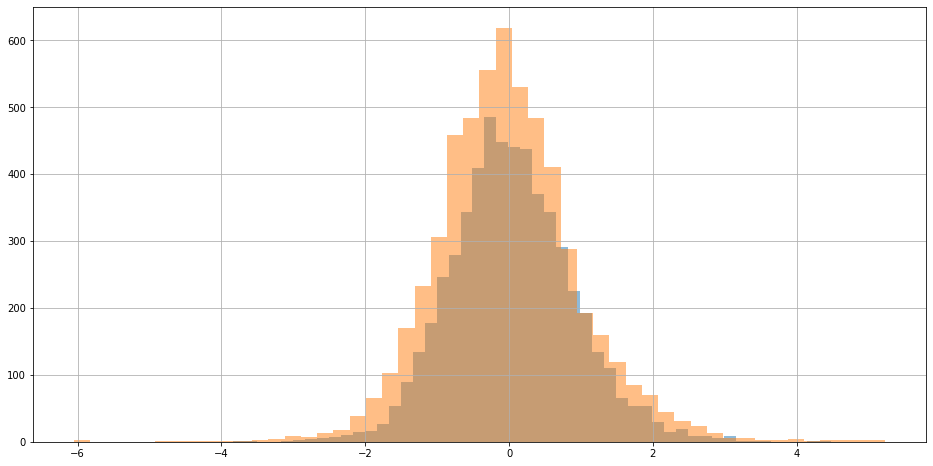

In [ ]:
#Histogram of a section of the DataFrame(EDA)

Data['TCGA-05-4244-01A'].hist(alpha=0.5, bins=50)
Data['TCGA-75-5122-01A'].hist(alpha=0.5, bins=50)

In [ ]:
#Creates Empirical Cumulative Distribution Function (ECDF) Plotting and Percentile Computation
def ecdf(data):
  x = np.sort(data)
  n = x.size
  y = np.arange(1, n+1) / n
  return(x, y)

def plot_ecfd(data):
  x, y = ecdf(data)
  plt.plot(x, y, marker=".", linestyle='none')

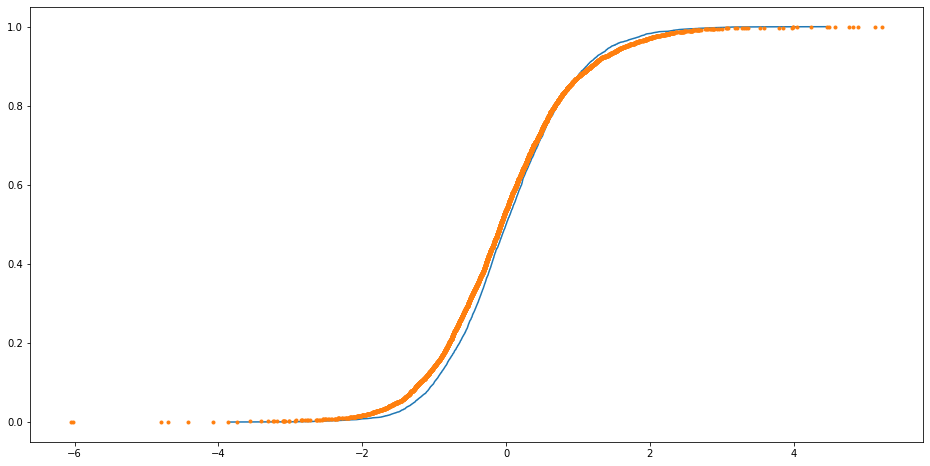

In [ ]:
#Tests a section of the data for normalization
df = pd.DataFrame(Data['TCGA-05-4244-01A'])
df["cdf"] = df['TCGA-05-4244-01A'].rank(method="average", pct=True)
df = df.sort_values('TCGA-05-4244-01A')
plt.plot(df['TCGA-05-4244-01A'], df['cdf'])
# plot_ecfd(Data['TCGA-05-4244-01A'])
plot_ecfd(Data['TCGA-75-5122-01A'])
plt.show()

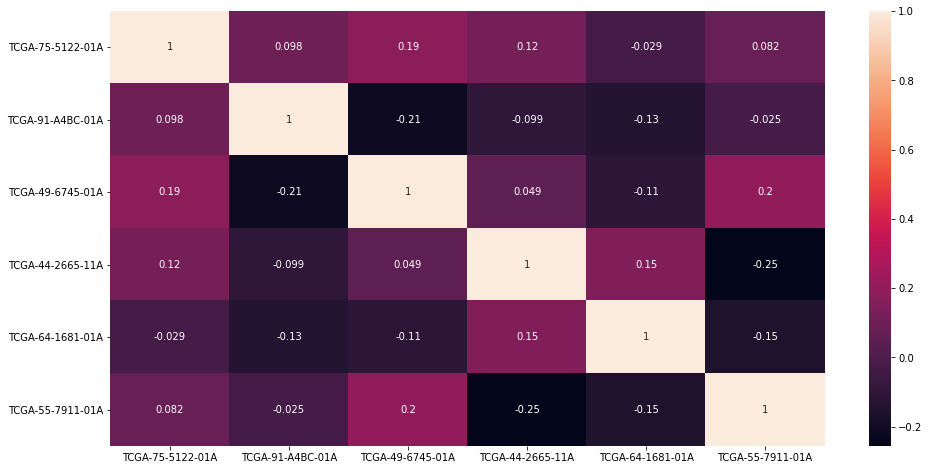

In [ ]:
#Creates a confusion matrix
import seaborn as sns
sns.heatmap(Data.iloc[:, [1,2,3,4,5,6]].corr(), annot=True)

In [ ]:
t_df = Data.T.copy()
t_df.head()

GeneID,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000227766,ENSG00000008517,ENSG00000070081,ENSG00000179833,ENSG00000225630,ENSG00000166913,ENSG00000130204,ENSG00000164182,ENSG00000179632,ENSG00000118363,ENSG00000121644,ENSG00000138495,ENSG00000176973,ENSG00000159479,ENSG00000112511,ENSG00000211950,ENSG00000142507,ENSG00000196704,ENSG00000259956,ENSG00000111641,ENSG00000143183,ENSG00000108774,ENSG00000183696,ENSG00000117139,ENSG00000135723,ENSG00000168300,ENSG00000227097,ENSG00000117394,ENSG00000164266,ENSG00000105048,ENSG00000198888,ENSG00000049239,ENSG00000089902,...,ENSG00000070526,ENSG00000115561,ENSG00000124422,ENSG00000172236,ENSG00000183010,ENSG00000148229,ENSG00000136451,ENSG00000244437,ENSG00000145247,ENSG00000198730,ENSG00000116406,ENSG00000178096,ENSG00000241294,ENSG00000143947,ENSG00000172590,ENSG00000115484,ENSG00000063046,ENSG00000143420,ENSG00000205138,ENSG00000205339,ENSG00000188986,ENSG00000111144,ENSG00000181191,ENSG00000092068,ENSG00000142733,ENSG00000172336,ENSG00000196586,ENSG00000178449,ENSG00000211660,ENSG00000110330,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
TCGA-J2-8192-01A,-0.203432,-1.223020,-0.003892,-0.370606,-0.474929,-0.517387,0.187262,0.946524,0.249871,-0.329160,1.423504,0.846728,0.186154,-1.152764,-0.083121,-0.560171,-0.772179,-0.048094,-1.159354,-0.303145,-0.387698,0.134313,0.138508,-1.125718,0.346592,-0.831235,-0.440182,-0.315127,-0.148498,1.062512,0.183375,0.155017,0.070299,-0.133984,0.398619,0.137058,-0.892458,-0.679678,0.985085,0.305266,...,0.627350,0.887405,-0.510300,1.016460,-0.487188,-0.201081,0.573223,-0.042841,0.604764,0.288545,0.438339,-0.389351,-0.231572,-1.446627,-1.104422,-0.668783,-0.926118,-0.289987,-1.060784,0.644959,-0.757304,-0.253804,2.348672,0.326075,0.698473,-0.620532,-0.208278,-0.882141,-0.033102,0.716217,0.806527,0.787099,0.252215,0.378805,0.973124,0.235461,0.045754,-1.248299,-0.280510,-0.349834
TCGA-75-5122-01A,0.236104,0.121795,-0.051263,0.027565,0.682040,0.176876,0.343691,1.878364,1.508427,-0.553952,-0.157720,-0.651205,0.645830,0.126501,1.442972,0.355049,-0.477563,-1.250297,-0.372086,-0.046288,-0.634542,-0.078889,0.033402,0.430054,0.237286,-0.493242,-0.705832,-0.930641,1.559890,1.371802,-2.005017,0.123532,-1.167503,0.419183,0.191202,-0.599249,-0.103103,-0.399097,-0.691518,-0.921035,...,-2.175711,-0.735329,-0.826496,0.409724,-0.029608,1.307107,0.600466,-0.177058,0.319754,-0.284403,-1.249803,-1.402772,-0.307118,-0.096527,0.268426,0.746069,-0.161271,-1.075323,-0.295094,-0.456457,0.588114,-0.508984,-0.443811,0.576261,-1.255324,-0.521635,-0.853889,-0.163455,0.616133,0.029171,-0.031108,1.854410,0.083291,0.613182,1.304720,-0.586759,0.691085,1.187933,-0.737064,0.657729
TCGA-91-A4BC-01A,1.244208,0.195003,-1.721174,0.493345,0.155672,0.495630,0.688316,0.117130,1.421114,0.417337,-1.460995,1.095103,-0.690438,0.315600,-0.010933,-0.472811,0.822057,-0.641192,0.366922,1.390668,-0.157003,0.799153,1.227995,0.652132,0.038337,0.458674,0.976694,-2.562043,-0.758483,-0.439675,-0.209849,-0.576769,0.480887,0.141506,-0.728217,-0.402993,-1.068257,1.681423,-0.126143,-1.390646,...,-1.468605,-3.153056,-0.300380,-0.156759,0.835275,0.176492,-1.796071,2.113394,-0.417241,-0.919345,-0.494332,1.131446,1.397446,0.226650,1.526449,-1.344799,-0.341863,-0.577241,-0.040037,-0.396896,1.021239,-0.184049,-0.287935,-0.122835,-0.996878,0.980043,-0.622999,-1.131320,2.296897,0.465688,0.054880,-0.597723,-0.464604,0.460844,0.280551,1.126219,1.953057,-1.524351,0.159171,0.876655
TCGA-49-6745-01A,-0.090358,1.275585,0.103439,-1.381483,0.048407,0.232981,0.080778,0.587451,0.034216,-0.813778,1.965744,-0.710436,1.079150,0.043645,0.226584,-0.842081,-0.817085,-0.701755,-0.701475,0.093381,-0.537099,-2.610262,-0.292617,0.003382,-0.012052,0.573844,-0.123873,-1.314119,0.733428,-0.483003,-0.670552,0.504852,-0.097380,0.217812,0.444289,-1.091058,1

In [ ]:
t_df.reset_index(inplace=True)
t_df = t_df.rename(columns={"index":"PatientID"})
t_df = t_df.rename_axis("Patient", axis="columns")
t_df.head()

Patient,PatientID,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000227766,ENSG00000008517,ENSG00000070081,ENSG00000179833,ENSG00000225630,ENSG00000166913,ENSG00000130204,ENSG00000164182,ENSG00000179632,ENSG00000118363,ENSG00000121644,ENSG00000138495,ENSG00000176973,ENSG00000159479,ENSG00000112511,ENSG00000211950,ENSG00000142507,ENSG00000196704,ENSG00000259956,ENSG00000111641,ENSG00000143183,ENSG00000108774,ENSG00000183696,ENSG00000117139,ENSG00000135723,ENSG00000168300,ENSG00000227097,ENSG00000117394,ENSG00000164266,ENSG00000105048,ENSG00000198888,ENSG00000049239,...,ENSG00000070526,ENSG00000115561,ENSG00000124422,ENSG00000172236,ENSG00000183010,ENSG00000148229,ENSG00000136451,ENSG00000244437,ENSG00000145247,ENSG00000198730,ENSG00000116406,ENSG00000178096,ENSG00000241294,ENSG00000143947,ENSG00000172590,ENSG00000115484,ENSG00000063046,ENSG00000143420,ENSG00000205138,ENSG00000205339,ENSG00000188986,ENSG00000111144,ENSG00000181191,ENSG00000092068,ENSG00000142733,ENSG00000172336,ENSG00000196586,ENSG00000178449,ENSG00000211660,ENSG00000110330,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,TCGA-J2-8192-01A,-0.203432,-1.223020,-0.003892,-0.370606,-0.474929,-0.517387,0.187262,0.946524,0.249871,-0.329160,1.423504,0.846728,0.186154,-1.152764,-0.083121,-0.560171,-0.772179,-0.048094,-1.159354,-0.303145,-0.387698,0.134313,0.138508,-1.125718,0.346592,-0.831235,-0.440182,-0.315127,-0.148498,1.062512,0.183375,0.155017,0.070299,-0.133984,0.398619,0.137058,-0.892458,-0.679678,0.985085,...,0.627350,0.887405,-0.510300,1.016460,-0.487188,-0.201081,0.573223,-0.042841,0.604764,0.288545,0.438339,-0.389351,-0.231572,-1.446627,-1.104422,-0.668783,-0.926118,-0.289987,-1.060784,0.644959,-0.757304,-0.253804,2.348672,0.326075,0.698473,-0.620532,-0.208278,-0.882141,-0.033102,0.716217,0.806527,0.787099,0.252215,0.378805,0.973124,0.235461,0.045754,-1.248299,-0.280510,-0.349834
1,TCGA-75-5122-01A,0.236104,0.121795,-0.051263,0.027565,0.682040,0.176876,0.343691,1.878364,1.508427,-0.553952,-0.157720,-0.651205,0.645830,0.126501,1.442972,0.355049,-0.477563,-1.250297,-0.372086,-0.046288,-0.634542,-0.078889,0.033402,0.430054,0.237286,-0.493242,-0.705832,-0.930641,1.559890,1.371802,-2.005017,0.123532,-1.167503,0.419183,0.191202,-0.599249,-0.103103,-0.399097,-0.691518,...,-2.175711,-0.735329,-0.826496,0.409724,-0.029608,1.307107,0.600466,-0.177058,0.319754,-0.284403,-1.249803,-1.402772,-0.307118,-0.096527,0.268426,0.746069,-0.161271,-1.075323,-0.295094,-0.456457,0.588114,-0.508984,-0.443811,0.576261,-1.255324,-0.521635,-0.853889,-0.163455,0.616133,0.029171,-0.031108,1.854410,0.083291,0.613182,1.304720,-0.586759,0.691085,1.187933,-0.737064,0.657729
2,TCGA-91-A4BC-01A,1.244208,0.195003,-1.721174,0.493345,0.155672,0.495630,0.688316,0.117130,1.421114,0.417337,-1.460995,1.095103,-0.690438,0.315600,-0.010933,-0.472811,0.822057,-0.641192,0.366922,1.390668,-0.157003,0.799153,1.227995,0.652132,0.038337,0.458674,0.976694,-2.562043,-0.758483,-0.439675,-0.209849,-0.576769,0.480887,0.141506,-0.728217,-0.402993,-1.068257,1.681423,-0.126143,...,-1.468605,-3.153056,-0.300380,-0.156759,0.835275,0.176492,-1.796071,2.113394,-0.417241,-0.919345,-0.494332,1.131446,1.397446,0.226650,1.526449,-1.344799,-0.341863,-0.577241,-0.040037,-0.396896,1.021239,-0.184049,-0.287935,-0.122835,-0.996878,0.980043,-0.622999,-1.131320,2.296897,0.465688,0.054880,-0.597723,-0.464604,0.460844,0.280551,1.126219,1.953057,-1.524351,0.159171,0.876655
3,TCGA-49-6745-01A,-0.090358,1.275585,0.103439,-1.381483,0.048407,0.232981,0.080778,0.587451,0.034216,-0.813778,1.965744,-0.710436,1.079150,0.043645,0.226584,-0.842081,-0.817085,-0.701755,-0.701475,0.093381,-0.537099,-2.610262,-0.292617,0.003382,-0.012052,0.573844,-0.123873,-1.314119,0.733428,-0.483003,-0.670552,0.504852,-0.097380,0.217812,0.444289,-1.091058,1.348971,-0.341466,-0.05125

In [ ]:
p_df = t_df.loc[:, t_df.columns != "PatientID"]
p_df.head()

Patient,ENSG00000146083,ENSG00000198242,ENSG00000134108,ENSG00000167700,ENSG00000070087,ENSG00000179262,ENSG00000064601,ENSG00000227766,ENSG00000008517,ENSG00000070081,ENSG00000179833,ENSG00000225630,ENSG00000166913,ENSG00000130204,ENSG00000164182,ENSG00000179632,ENSG00000118363,ENSG00000121644,ENSG00000138495,ENSG00000176973,ENSG00000159479,ENSG00000112511,ENSG00000211950,ENSG00000142507,ENSG00000196704,ENSG00000259956,ENSG00000111641,ENSG00000143183,ENSG00000108774,ENSG00000183696,ENSG00000117139,ENSG00000135723,ENSG00000168300,ENSG00000227097,ENSG00000117394,ENSG00000164266,ENSG00000105048,ENSG00000198888,ENSG00000049239,ENSG00000089902,...,ENSG00000070526,ENSG00000115561,ENSG00000124422,ENSG00000172236,ENSG00000183010,ENSG00000148229,ENSG00000136451,ENSG00000244437,ENSG00000145247,ENSG00000198730,ENSG00000116406,ENSG00000178096,ENSG00000241294,ENSG00000143947,ENSG00000172590,ENSG00000115484,ENSG00000063046,ENSG00000143420,ENSG00000205138,ENSG00000205339,ENSG00000188986,ENSG00000111144,ENSG00000181191,ENSG00000092068,ENSG00000142733,ENSG00000172336,ENSG00000196586,ENSG00000178449,ENSG00000211660,ENSG00000110330,ENSG00000071889,ENSG00000171867,ENSG00000178209,ENSG00000103266,ENSG00000105968,ENSG00000099991,ENSG00000102265,ENSG00000133313,ENSG00000066044,ENSG00000105063
0,-0.203432,-1.223020,-0.003892,-0.370606,-0.474929,-0.517387,0.187262,0.946524,0.249871,-0.329160,1.423504,0.846728,0.186154,-1.152764,-0.083121,-0.560171,-0.772179,-0.048094,-1.159354,-0.303145,-0.387698,0.134313,0.138508,-1.125718,0.346592,-0.831235,-0.440182,-0.315127,-0.148498,1.062512,0.183375,0.155017,0.070299,-0.133984,0.398619,0.137058,-0.892458,-0.679678,0.985085,0.305266,...,0.627350,0.887405,-0.510300,1.016460,-0.487188,-0.201081,0.573223,-0.042841,0.604764,0.288545,0.438339,-0.389351,-0.231572,-1.446627,-1.104422,-0.668783,-0.926118,-0.289987,-1.060784,0.644959,-0.757304,-0.253804,2.348672,0.326075,0.698473,-0.620532,-0.208278,-0.882141,-0.033102,0.716217,0.806527,0.787099,0.252215,0.378805,0.973124,0.235461,0.045754,-1.248299,-0.280510,-0.349834
1,0.236104,0.121795,-0.051263,0.027565,0.682040,0.176876,0.343691,1.878364,1.508427,-0.553952,-0.157720,-0.651205,0.645830,0.126501,1.442972,0.355049,-0.477563,-1.250297,-0.372086,-0.046288,-0.634542,-0.078889,0.033402,0.430054,0.237286,-0.493242,-0.705832,-0.930641,1.559890,1.371802,-2.005017,0.123532,-1.167503,0.419183,0.191202,-0.599249,-0.103103,-0.399097,-0.691518,-0.921035,...,-2.175711,-0.735329,-0.826496,0.409724,-0.029608,1.307107,0.600466,-0.177058,0.319754,-0.284403,-1.249803,-1.402772,-0.307118,-0.096527,0.268426,0.746069,-0.161271,-1.075323,-0.295094,-0.456457,0.588114,-0.508984,-0.443811,0.576261,-1.255324,-0.521635,-0.853889,-0.163455,0.616133,0.029171,-0.031108,1.854410,0.083291,0.613182,1.304720,-0.586759,0.691085,1.187933,-0.737064,0.657729
2,1.244208,0.195003,-1.721174,0.493345,0.155672,0.495630,0.688316,0.117130,1.421114,0.417337,-1.460995,1.095103,-0.690438,0.315600,-0.010933,-0.472811,0.822057,-0.641192,0.366922,1.390668,-0.157003,0.799153,1.227995,0.652132,0.038337,0.458674,0.976694,-2.562043,-0.758483,-0.439675,-0.209849,-0.576769,0.480887,0.141506,-0.728217,-0.402993,-1.068257,1.681423,-0.126143,-1.390646,...,-1.468605,-3.153056,-0.300380,-0.156759,0.835275,0.176492,-1.796071,2.113394,-0.417241,-0.919345,-0.494332,1.131446,1.397446,0.226650,1.526449,-1.344799,-0.341863,-0.577241,-0.040037,-0.396896,1.021239,-0.184049,-0.287935,-0.122835,-0.996878,0.980043,-0.622999,-1.131320,2.296897,0.465688,0.054880,-0.597723,-0.464604,0.460844,0.280551,1.126219,1.953057,-1.524351,0.159171,0.876655
3,-0.090358,1.275585,0.103439,-1.381483,0.048407,0.232981,0.080778,0.587451,0.034216,-0.813778,1.965744,-0.710436,1.079150,0.043645,0.226584,-0.842081,-0.817085,-0.701755,-0.701475,0.093381,-0.537099,-2.610262,-0.292617,0.003382,-0.012052,0.573844,-0.123873,-1.314119,0.733428,-0.483003,-0.670552,0.504852,-0.097380,0.217812,0.444289,-1.091058,1.348971,-0.341466,-0.051257,0.348358,...,0.553889,1.304131,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.decomposition import PCA

594
<class 'int'>


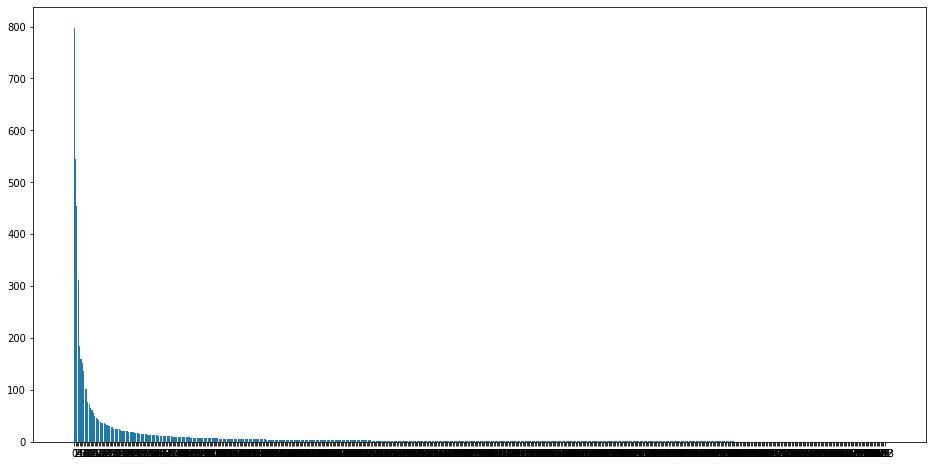

In [ ]:
model = PCA()
model.fit(p_df)
n = model.n_components_
print(n)
print(type(n))
featur = list(np.arange(n))
plt.bar(featur, model.explained_variance_)
plt.xticks(featur)
plt.show()

(594, 3)


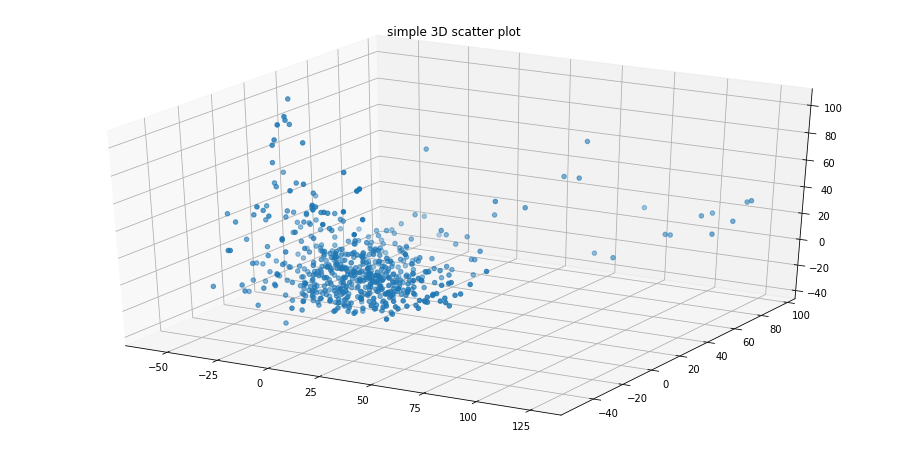

In [ ]:
# range = [100, 250, 500, n]
# for i in range:
n_model = PCA(n_components=3)
res = n_model.fit_transform(p_df)
print(res.shape)

ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(res[:, 0], res[:, 1], res[:, 2])
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


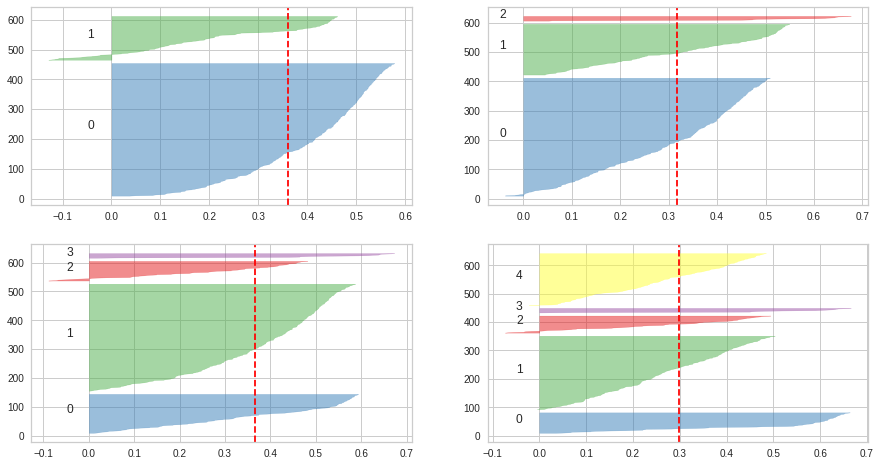

In [ ]:

from yellowbrick.cluster import SilhouetteVisualizer

# plot using the best four silhouettee scores [2, 3, 4, 5]
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # Create SilhouetteVisualizer instance with KMeans instance 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    #Fit the visualizer
    visualizer.fit(res)


In [ ]:
#Create Survival Data Frame - Modify Vital Status - Modify Days to Event 

S_df = pd.read_csv('../content/drive/My Drive/clinical.tsv', sep='\t')
S_df = S_df[['case_submitter_id', 'vital_status', 'days_to_death', 'days_to_last_follow_up']]
S_df = S_df.rename(columns={'case_submitter_id':'PatientID'})
S_df.head()


,PatientID,vital_status,days_to_death,days_to_last_follow_up
0,TCGA-05-4244,Alive,'--,0
1,TCGA-05-4244,Alive,'--,0
2,TCGA-75-6203,Alive,'--,'--
3,TCGA-75-6203,Alive,'--,'--
4,TCGA-44-2665,Alive,'--,1301


In [ ]:
S_df['0'] = 0
S_df['1'] = 0
S_df['2'] = 0

In [ ]:
S_df.head()

,PatientID,vital_status,days_to_death,days_to_last_follow_up,0,1,2
0,TCGA-05-4244,Alive,'--,0,0,0,0
1,TCGA-05-4244,Alive,'--,0,0,0,0
2,TCGA-75-6203,Alive,'--,'--,0,0,0
3,TCGA-75-6203,Alive,'--,'--,0,0,0
4,TCGA-44-2665,Alive,'--,1301,0,0,0


In [ ]:
S_df1 = pd.get_dummies(S_df, columns = ['0', '1', '2'], drop_first = True)

In [ ]:
S_df1.head()

,PatientID,vital_status,days_to_death,days_to_last_follow_up
0,TCGA-05-4244,Alive,'--,0
1,TCGA-05-4244,Alive,'--,0
2,TCGA-75-6203,Alive,'--,'--
3,TCGA-75-6203,Alive,'--,'--
4,TCGA-44-2665,Alive,'--,1301


In [ ]:
S_df1['vital_status'] = S_df1['vital_status'].replace(['Alive','Dead',],['False','True'])
S_df1 = S_df1.rename(columns={'vital_status': 'event_observed'})

In [ ]:
S_df1['days_to_death'] = S_df1['days_to_death'].replace("'--","")
S_df1['days_to_last_follow_up'] = S_df1['days_to_last_follow_up'].replace("'--","")
S_df1['days_to_death'] = pd.to_numeric(S_df1['days_to_death'])
S_df1['days_to_last_follow_up'] = pd.to_numeric(S_df1['days_to_last_follow_up'])                                                                
S_df1.loc[S_df1['event_observed'] == 'True', 'days_to_event'] = (S_df1['days_to_death'])/365
S_df1.loc[S_df1['event_observed'] == 'False', 'days_to_event'] = (S_df1['days_to_last_follow_up'])/365

In [ ]:
S_df1= S_df1.drop(['days_to_death','days_to_last_follow_up'], axis=1)
S_df1 = S_df1[pd.notnull(S_df1['days_to_event'])]
print(S_df1.shape)
S_df1.head()

(1012, 3)


,PatientID,event_observed,days_to_event
0,TCGA-05-4244,False,0.000000
1,TCGA-05-4244,False,0.000000
4,TCGA-44-2665,False,3.564384
5,TCGA-44-2665,False,3.564384
6,TCGA-55-8094,False,1.482192


In [ ]:
S_df1["days_to_event"] = S_df1["days_to_event"].astype(int)
S_df1["event_observed"] = S_df1["event_observed"].astype(bool)


In [ ]:
Cluster_0 = S_df1.sample(n=198, frac=None, replace=False, weights=None, random_state=42, axis=None)
Cluster_1 = S_df1.sample(n=198, frac=None, replace=False, weights=None, random_state=42, axis=None)
Cluster_2 = S_df1.sample(n=198, frac=None, replace=False, weights=None, random_state=42, axis=None)

In [ ]:
S_df1.head(100)

,PatientID,event_observed,days_to_event
0,TCGA-05-4244,True,0
1,TCGA-05-4244,True,0
4,TCGA-44-2665,True,3
5,TCGA-44-2665,True,3
6,TCGA-55-8094,True,1
...,...,...,...
99,TCGA-55-8616,True,0
100,TCGA-L4-A4E6,True,1
101,TCGA-L4-A4E6,True,1
102,TCGA-49-4488,True,2


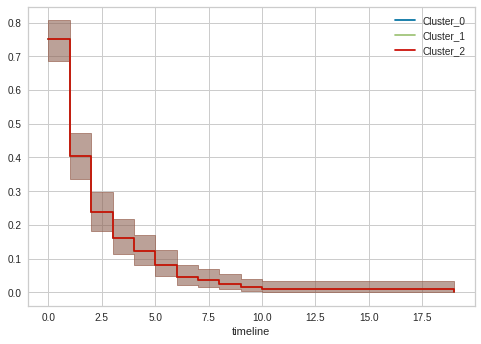

In [ ]:
from lifelines import KaplanMeierFitter
KMF0 = KaplanMeierFitter(label= "Cluster_0")
KMF0.fit(Cluster_0['days_to_event'],Cluster_0['event_observed'])
KMF0.plot()

KMF1 = KaplanMeierFitter(label= "Cluster_1")
KMF1.fit(Cluster_1['days_to_event'],Cluster_1['event_observed'])
KMF1.plot()

KMF2 = KaplanMeierFitter(label= "Cluster_2")
KMF2.fit(Cluster_2['days_to_event'],Cluster_2['event_observed'])
KMF2.plot()

In [ ]:

from lifelines import CoxPHFitter
cph = CoxPHFitter()
Cluster_0 = S_df1[['event_observed','days_to_event']]
Cluster_1 = S_df1[['event_observed','days_to_event']]
Cluster_2 = S_df1[['event_observed','days_to_event']]


#Cluster_0
cph.fit(Cluster_0, 'days_to_event','event_observed')
#Cluster_1
cph.fit(Cluster_1, 'days_to_event','event_observed')

#Cluster_2
cph.fit(Cluster_2, 'days_to_event','event_observed')

cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1012 total observations, 0 right-censored observations>
             duration col = 'days_to_event'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 1012
number of events observed = 1012
   partial log-likelihood = -5995.10
         time fit was run = 2021-02-21 19:00:56 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 11990.20
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

In [ ]:
#%%shell
#jupyter nbconvert -- to html /content/LUAD_Analysis.ipynb